<a href="https://colab.research.google.com/github/AleFax99/DeepLearning_GroupProject/blob/main/DL_Assignment_baseline_2__IN_USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Snippets


In [ ]:
from keras.models import load_model
baseline_model = load_model("./Results and Models/baseline_model")

# Loading Dataset

You can download the dataset from {https://darwin.v7labs.com/v7-labs/covid-19-chest-x-ray-dataset?sort=priority\%3Adesc}.
The data entitled as '`darwin dataset pull v7-labs/covid-19-chest-x-ray-dataset:all-images`' will be used in this assignment. All dataset consist of 6504 images from 702 classes. We will extract the images of 4 classes (Bacterial Pneumonia, Viral Pneumonia, No Pneumonia (healthy), Covid-19) and save them as .npy file with the following code:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Deep Learning - Group Project 
#### Andreea Gdrive path

/content/drive/.shortcut-targets-by-id/1qsBT4V5PUBeJK1UavH8V46pQAoKjtkPa/Deep Learning - Group Project


In [ ]:
# %cd /content/drive/MyDrive/Deep Learning/Deep Learning - Group Project
# !pwd

In [4]:
import numpy as np

y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')
y_val = np.load('./y_val.npy')
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
X_val = np.load('./X_val.npy')

In [ ]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models


In [ ]:
# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")
# print(type(imageNames))
# print(len(imageNames))
# print(imageNames)

In [ ]:

# import json
# import numpy as np
# import glob
# import pandas as pd

# # importing modules
# import urllib.request
# from PIL import Image
# from keras import layers, models
# import tensorflow as tf

# # all-images file should be uploaded to the same file
# imageNames = glob.glob("./all-images/*")

# dataset = []
# labels = []

# for i, imName in enumerate(imageNames):

#     # Opening JSON file
#     f = open(imName)
#     data = json.load(f)
#     for j in range(len(data['annotations'])):

#         if 'COVID-19' in (data['annotations'][j]['name']):
#           #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             print(label)
#             break

#         if 'Viral Pneumonia' in (data['annotations'][j]['name']) \
#             or 'Bacterial Pneumonia' in (data['annotations'][j]['name']) \
#             or 'No Pneumonia (healthy)' in (data['annotations'][j]['name']):
#             #load images from url    
#             urllib.request.urlretrieve(data['image']['url'],"img.png")    
#             img = Image.open("img.png")
#             #convert images to grayscale
#             imgGray = img.convert('L')
#             #resize the image (156x156)
#             im = imgGray.resize((156,156), Image.LANCZOS)           
#             label = data['annotations'][j]['name']
#             dataset.append(np.array(im))
#             labels.append(label)
#             break

# #Convert data shape of (n_of_samples, width, height, 1)
# dataset = np.dstack(dataset)    
# dataset = np.rollaxis(dataset,-1)
# labels = np.array(labels)

# #convert images gray scale to rgb
# data = np.array(layers.Lambda(tf.image.grayscale_to_rgb)(tf.expand_dims(dataset, -1)))

# # save data and labels into a folder
# np.save("./data.npy", data)
# np.save("./labels.npy", labels)

Once you save your data, you can load it from your directory.

In [ ]:
import numpy as np

data = np.load('./data.npy')
labels = np.load('./labels.npy')

# Preprocessing Steps



## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(data, labels, test_size= 0.2, stratify= labels, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 0.25, stratify= y_train_val , random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(3840, 156, 156, 3) (1280, 156, 156, 3) (1281, 156, 156, 3)


## Normalize Data

In [ ]:
# normalize to range 0-1
# Note: minimum = 0, maximum = 255.0
# Formula: (value - minimum) / (maximum - minimum)
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3840, 156, 156, 3)
(1280, 156, 156, 3)
(1281, 156, 156, 3)


In [ ]:
np.unique(y_train, return_counts=True) # we are dealing with an imbalanced dataset (miro-avg)


(array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
        'Viral Pneumonia'], dtype='<U22'), array([1695,   76,  964, 1105]))

In [ ]:
np.unique(labels, return_counts=True)

(array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
        'Viral Pneumonia'], dtype='<U22'), array([2825,  127, 1606, 1843]))

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)


In [ ]:
le.classes_

array(['Bacterial Pneumonia', 'COVID-19', 'No Pneumonia (healthy)',
       'Viral Pneumonia'], dtype='<U22')

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
np.save("./y_train.npy", y_train)
np.save("./y_test.npy", y_test)
np.save("./y_val.npy", y_val)
np.save("./X_train.npy", X_train)
np.save("./X_test.npy", X_test)
np.save("./X_val.npy", X_val)

# Create Baseline Model

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers



def build_model(optimizer='adam'): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(64, (3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(32, activation="relu"))
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model


In [9]:
# model.build()
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                    

In [10]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
original_hist = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, y_val), 
    verbose=0
)
history_dict = original_hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
model.save("./Results and Models/baseline_model")

# https://www.tensorflow.org/guide/keras/save_and_serialize

In [30]:
from keras.models import load_model
baseline_model = load_model("./Results and Models/baseline_model")

In [28]:
np.save("./Results and Models/baseline_hist.npy", history_dict) #saving
history_baseline=np.load('./Results and Models/baseline_hist.npy',allow_pickle='TRUE').item() #loading

In [29]:
history_baseline.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Analyze the performance of the baseline model

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test) # 0.7377

41/41 [==============================] - 1s 22ms/step - loss: 1.2613 - accuracy: 0.7237


# Plots

## Training and validation losses and accuracies on the training and validation set

In [5]:
#plot
import matplotlib.pyplot as plt

def plot_history(data_list, label_list, title, ylabel):
    ''' Plots a list of vectors.
    Parameters:
        data_list  : list of vectors containing the values to plot
        label_list : list of labels describing the data, one per vector
        title      : title of the plot
        ylabel     : label for the y axis
    '''
    epochs = range(1, len(data_list[0]) + 1)
    for data, label in zip(data_list, label_list):
        plt.plot(epochs, data, label=label)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

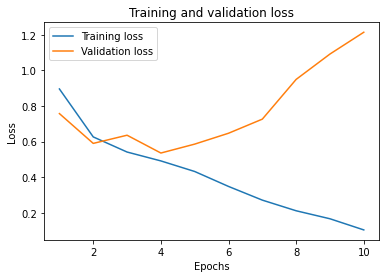

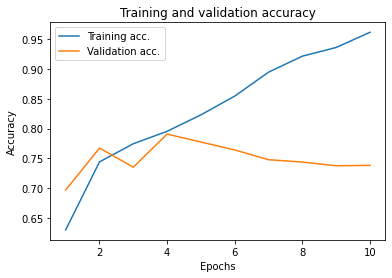

In [13]:
%matplotlib inline

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

## Receiver Operator Characteristic (ROC) curve with the Area under the Curve (AUC) score

Preprocessing:

In [ ]:
class_of_interest = "COVID-19"
class_id = np.flatnonzero(le.classes_ == class_of_interest)[0]
class_id

1

In [ ]:
y_pred = model.predict(X_test)

41/41 [==============================] - 1s 15ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.91


In [ ]:
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(len(le.classes_)):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= len(le.classes_)

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.86


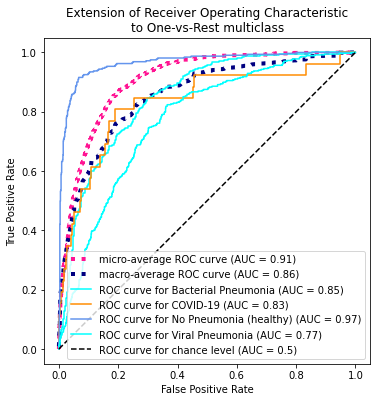

In [ ]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(le.classes_)), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        y_pred[:, class_id],
        name=f"ROC curve for {le.classes_[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

## Confusion matrix for the validation and test set

In [ ]:
y_val_pred = model.predict(X_val)

40/40 [==============================] - 1s 15ms/step


In [ ]:
y_val_train = model.predict(X_train)

120/120 [==============================] - 2s 15ms/step


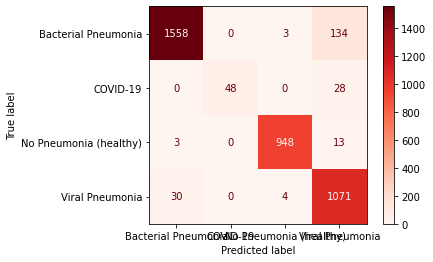

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

labels = le.classes_ 
cm = confusion_matrix(y_train.argmax(axis=1), y_val_train.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

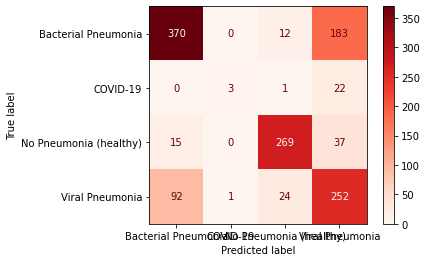

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

labels = le.classes_ 
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()

# cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# print(cm)
# acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# print('test_accuracy: %.3f' % (acc))

# Adapting/fine-tuning the network

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers



def build_tuned_model(optimizer='adam'): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(64, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(32, (3,3), activation='relu', padding="same"))
  model.add(layers.Conv2D(64, (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(64, activation="relu"))
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer= optimizer, 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model

In [7]:
from tensorflow.keras.optimizers import Adam
tuned_model = build_tuned_model(optimizer = Adam(learning_rate=0.0001)  )


In [8]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)
tuned_hist = tuned_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val), 
    verbose=0
)
history_dict_tuned = tuned_hist.history
history_dict_tuned.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
tuned_model.save("./Results and Models/tuned_model_3")
np.save("./Results and Models/history_dict_tuned_3.npy", history_dict_tuned) #saving hist

In [10]:
test_loss, test_acc = tuned_model.evaluate(X_test, y_test) # 0.7377

41/41 [==============================] - 1s 25ms/step - loss: 0.9897 - accuracy: 0.7572


In [12]:
from keras.models import load_model
tuned_model = load_model("./Results and Models/tuned_model") #load the model
history_tuned=np.load('./Results and Models/history_dict_tuned.npy',allow_pickle='TRUE').item() #load teh hist dict

tuned_model_1 = load_model("./Results and Models/tuned_model_1") #load the model
history_tuned_1=np.load('./Results and Models/history_dict_tuned_1.npy',allow_pickle='TRUE').item() #load teh hist dict

tuned_model_2 = load_model("./Results and Models/tuned_model_2") #load the model
history_tuned_2=np.load('./Results and Models/history_dict_tuned_2.npy',allow_pickle='TRUE').item() #load teh hist dict

tuned_model_3 = load_model("./Results and Models/tuned_model_3") #load the model
history_tuned_3=np.load('./Results and Models/history_dict_tuned_3.npy',allow_pickle='TRUE').item() #load teh hist dict

baseline_model = load_model("./Results and Models/baseline_model")
history_baseline=np.load('./Results and Models/baseline_hist.npy',allow_pickle='TRUE').item() #loading

In [23]:
tuned_model_1.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [24]:
tuned_model_2.optimizer.get_config()

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 1e-04,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

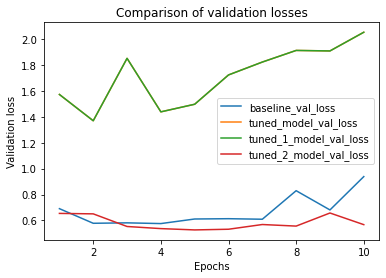

In [16]:
baseline_val_loss = history_baseline['val_loss']
tuned_model_val_loss = history_tuned['val_loss']
tuned_1_model_val_loss = history_tuned_1['val_loss']
tuned_2_model_val_loss = history_tuned_2['val_loss']
tuned_3_model_val_loss = history_tuned_3['val_loss']

plot_history(data_list=[baseline_val_loss, tuned_model_val_loss,tuned_1_model_val_loss,tuned_2_model_val_loss ],
             label_list=['baseline_val_loss', 'tuned_model_val_loss', 'tuned_1_model_val_loss',  'tuned_2_model_val_loss'],
             title='Comparison of validation losses',
             ylabel='Validation loss')

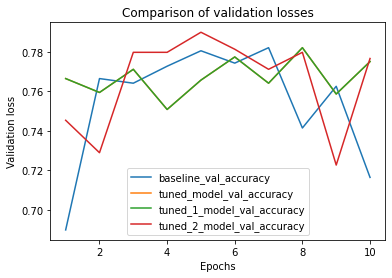

In [26]:
baseline_val_accuracy = history_baseline['val_accuracy']
tuned_model_val_accuracy = history_tuned['val_accuracy']
tuned_1_model_val_accuracy = history_tuned_1['val_accuracy']
tuned_2_model_val_accuracy = history_tuned_2['val_accuracy']
tuned_3_model_val_accuracy = history_tuned_3['val_accuracy']

plot_history(data_list=[baseline_val_accuracy, tuned_model_val_accuracy,tuned_1_model_val_accuracy,tuned_2_model_val_accuracy ],
             label_list=['baseline_val_accuracy', 'tuned_model_val_accuracy', 'tuned_1_model_val_accuracy',  'tuned_2_model_val_accuracy'],
             title='Comparison of validation accuracy',
             ylabel='Validation accuracy')

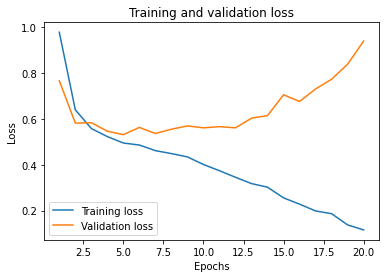

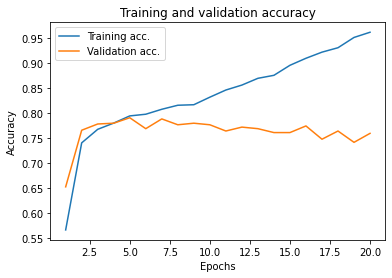

In [11]:
%matplotlib inline

acc = history_dict_tuned['accuracy']
val_acc = history_dict_tuned['val_accuracy']
loss = history_dict_tuned['loss']
val_loss = history_dict_tuned['val_loss']

plot_history(data_list=[loss, val_loss],
             label_list=['Training loss', 'Validation loss'],
             title='Training and validation loss',
             ylabel='Loss')
plot_history(data_list=[acc, val_acc],
             label_list=['Training acc.', 'Validation acc.'],
             title='Training and validation accuracy',
             ylabel='Accuracy')

In [54]:
pip install keras --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import keras_tuner
from tensorflow import keras

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam
## activation,
def tobe_tuned_model( units_1 , units_2, lr): # which inputs should we have?
  model = models.Sequential()
  model.add(layers.Conv2D(units_1, kernel_size= (3,3), activation='relu', input_shape = (156,156,3), padding="same"))
  model.add(layers.Conv2D(units_2, kernel_size= (3,3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Conv2D(units_1,  kernel_size=(3,3), activation='relu', padding="same"))
  # if dropout:
  #     model.add(layers.Dropout(rate=dropout_rate))
  model.add(layers.Conv2D(units_2,  kernel_size = (3,3), activation='relu', padding="same"))
  
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
  model.add(layers.Flatten())
  model.add(layers.Dense(units_2, activation="relu"))
  model.add(layers.Dense(units_2, activation="relu"))
  
  model.add(layers.Dense(4, activation="softmax"))

  model.compile(optimizer=Adam(learning_rate = lr), 
                         loss="categorical_crossentropy",
                         metrics=['accuracy']
                         )
  return model



def build_tuned_model(hp):
  units_1 = hp.Int('units_1', min_value = 16 , max_value = 256, step = 16)
  units_2 = hp.Int('units_2', min_value = 16 , max_value = 256, step = 16)
  # dropout = hp.Boolean("dropout")

  # dropout_rate = hp.Float("dropout_rate", min_value=0.2, max_value=1, step=0.2,parent_name=dropout , parent_values=True )
  # activation = hp.Choice("activation", ["relu", "tanh"])
  lr = hp.Float("lr", min_value=1e-6, max_value=0.001, step=10,sampling="log", default=1e-3)
  # call existing model-building code with the hyperparameter values.
  model = tobe_tuned_model(
       lr=lr , units_1 = units_1 , units_2 = units_2
  )
  return model

##dropout=dropout, lr=lr , dropout_rate = dropout_rate

In [8]:
1e-2

0.01

In [15]:

build_tuned_model(keras_tuner.HyperParameters())

In [16]:
# from tensorflow.keras.utils import set_random_seed
# set_random_seed(42)

tuner = keras_tuner.RandomSearch(
    hypermodel=build_tuned_model,
    objective="val_accuracy",
    max_trials=2,
    executions_per_trial=1,
    overwrite=True,
    directory="./Results and Models",
    project_name="KerasTunning",
    seed = 42
)

In [17]:
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Trial 2 Complete [00h 08m 27s]
val_accuracy: 0.785937488079071

Best val_accuracy So Far: 0.785937488079071
Total elapsed time: 00h 11m 54s


In [18]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]

In [19]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 80)      2240      
                                                                 
 conv2d_1 (Conv2D)           (None, 156, 156, 240)     173040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 240)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 78, 78, 80)        172880    
                                                                 
 conv2d_3 (Conv2D)           (None, 78, 78, 240)       173040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 240)      0         
 2D)                                                    

In [20]:
tuner.results_summary()

Results summary
Results in ./Results and Models/KerasTunning
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 80
units_2: 240
lr: 9.999999999999999e-06
Score: 0.785937488079071
Trial summary
Hyperparameters:
units_1: 176
units_2: 16
lr: 9.999999999999999e-06
Score: 0.75390625


# Transfer Learning